In [102]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection, metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, plot_confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.linear_model import LogisticRegression, SGDClassifier, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

import xgboost as xgb
from xgboost import XGBClassifier

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [103]:
df = pd.read_csv("creditcard.csv")

In [104]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [105]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [106]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### No null values

In [107]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [108]:
df.Class.value_counts()/df.Class.count()*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

### Only 492 (0.172%) transactions are fraudulent.

### The dataset is highly unbalanced

In [109]:
class_0 = df.loc[df['Class'] == 0]
class_0

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [110]:
class_1 = df.loc[df['Class'] == 1]
class_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [11]:
corr = df.corr()

<AxesSubplot:>

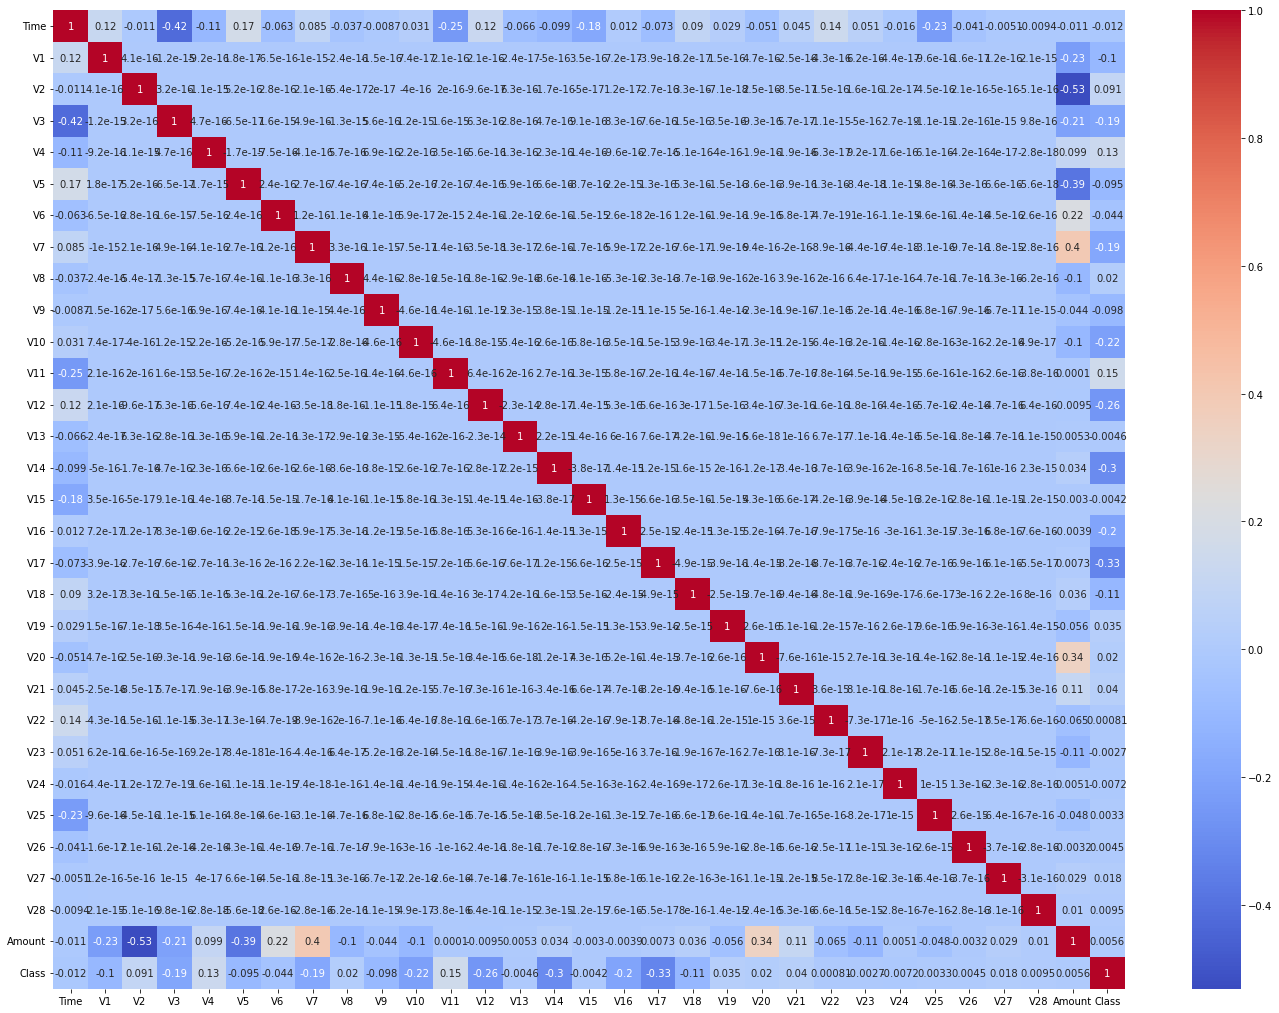

In [12]:
plt.figure(figsize=(24,18))

sns.heatmap(corr, annot=True, cmap="coolwarm")

## Correlation Notes

No notable correlation between V1-V28.

### Time: 
Inverse with: V3

### Amount:
Direct with: V7 and V20
Inverse with: V2 and V5

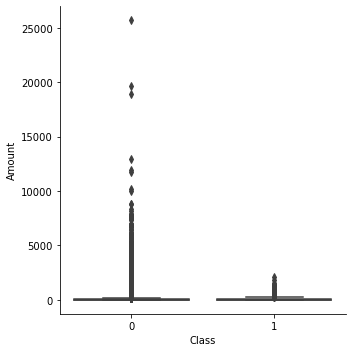

In [13]:
sns.factorplot(y="Amount", x="Class", data=df, kind="box")

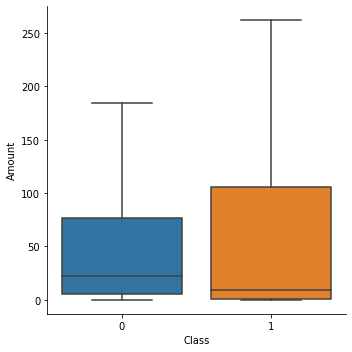

In [14]:
sns.factorplot(y="Amount", x="Class", data=df, kind="box", showfliers=False)

In [15]:
class_0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [16]:
class_1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


### Real Transactions
Larger mean, Q1, Q2, and outliers
Smaller Q3 and Q4

### Fraudulent Transactions
Larger Q3 and Q4
Smaller mean, Q1 and Q2

### Let's look at collerations closely

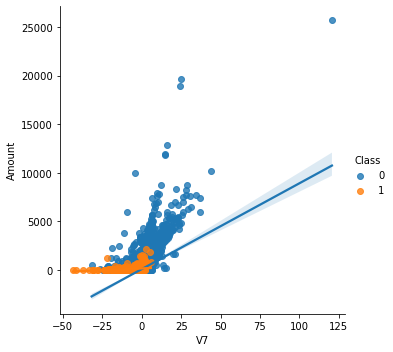

In [17]:
sns.lmplot(data=df, x="V7", y="Amount", hue="Class")

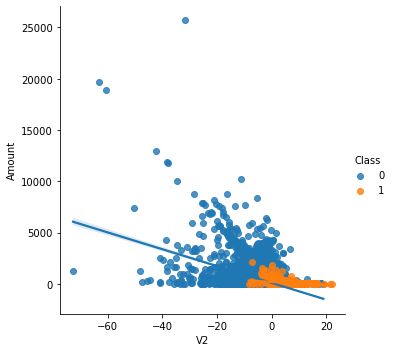

In [18]:
sns.lmplot(data=df, x="V2", y="Amount", hue="Class")

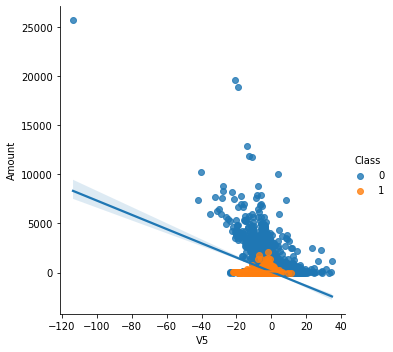

In [19]:
sns.lmplot(data=df, x="V5", y="Amount", hue="Class")

In [111]:
df1 = df

In [112]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [113]:
df2 = df1.drop(['Class'], axis=1)
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [114]:
x = df2

In [115]:
y = df1['Class']

In [25]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [116]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## Splitting the Data into Train and Test


In [117]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)

In [118]:
print('Data size is:', df2.shape)
print('x_train size is:', x_train.shape)
print('x_test size is:', x_test.shape)
print('y_train size is:', y_train.shape)
print('y_test size is:', y_test.shape)

Data size is: (284807, 30)
x_train size is: (213605, 30)
x_test size is: (71202, 30)
y_train size is: (213605,)
y_test size is: (71202,)


## Model Building and Selection

### Creating a function to plot confusion matrix and run ML algorithms

In [119]:
def run_ml_algo(algo, x_train, y_train, cv):
    
    # no CV
    model = algo.fit(x_train, y_train)
    accu = round(model.score(x_train, y_train)*100, 2)
    
    feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
    feat_importances.nlargest(20).plot(kind='barh')
    
    # with 10-fold CV
    prediction = model_selection.cross_val_predict(algo, x_train, y_train, cv=cv, n_jobs = -1)
    
    # CV accuracy
    accu_cv = round(metrics.accuracy_score(y_train, prediction)*100, 2)
    
    roc_value = roc_auc_score(y_train, prediction)
    
    precision = precision_score(y_train, prediction)
    recall    = recall_score(y_train, prediction)
    f1        = f1_score(y_train, prediction)
    
    plot_confusion_matrix(algo, x_train, y_train)
    plt.show()
    
    return accu, prediction, accu_cv, roc_value, precision, recall, f1

/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/naman_bhatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

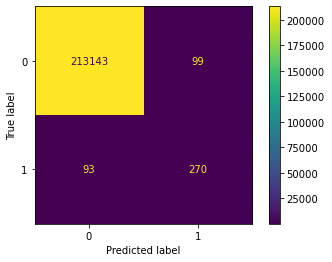

Accuracy without cross-validation: 99.91
Accuracy with 10-fold cross-validation: 99.9
ROC value: 0.8344762684168788
Precision: 0.7084548104956269
Recall: 0.6694214876033058
F score: 0.688385269121813


In [46]:
accu_log, prediction_log, accu_cv_log, roc_log, precision_log, recall_log, f1_log = run_ml_algo(LogisticRegression(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_log)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_log)
print("ROC value: %s" % roc_log)
print("Precision: %s" % precision_log)
print("Recall: %s" % recall_log)
print("F score: %s" % f1_log)

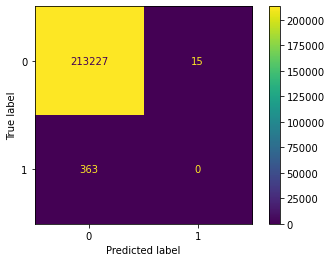

Accuracy without cross-validation: 99.82
Accuracy with 10-fold cross-validation: 99.82
ROC value: 0.4999577944307407
Precision: 0.0
Recall: 0.0
F score: 0.0


In [47]:
accu_sgd, prediction_sgd, accu_cv_sgd, roc_sgd, precision_sgd, recall_sgd, f1_sgd = run_ml_algo(SGDClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_sgd)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_sgd)
print("ROC value: %s" % roc_sgd)
print("Precision: %s" % precision_sgd)
print("Recall: %s" % recall_sgd)
print("F score: %s" % f1_sgd)

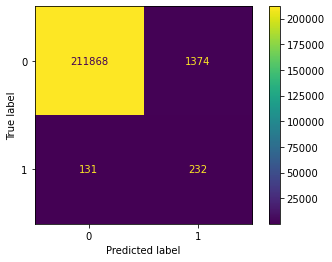

Accuracy without cross-validation: 99.3
Accuracy with 10-fold cross-validation: 99.3
ROC value: 0.8135967844497888
Precision: 0.1439299123904881
Recall: 0.6336088154269972
F score: 0.23457419683834776


In [48]:
accu_nb, prediction_nb, accu_cv_nb, roc_nb, precision_nb, recall_nb, f1_nb = run_ml_algo(GaussianNB(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_nb)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_nb)
print("ROC value: %s" % roc_nb)
print("Precision: %s" % precision_nb)
print("Recall: %s" % recall_nb)
print("F score: %s" % f1_nb)

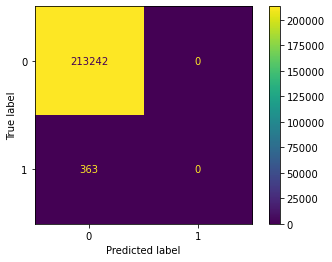

Accuracy without cross-validation: 99.83
Accuracy with 10-fold cross-validation: 99.83
ROC value: 0.5
F score: 0.0
Precision: 0.0
Recall: 0.0


In [49]:
accu_svc, prediction_svc, accu_cv_svc, roc_svc, f1_svc, precision_svc, recall_svc = run_ml_algo(SVC(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_svc)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_svc)
print("ROC value: %s" % roc_svc)
print("F score: %s" % f1_svc)
print("Precision: %s" % precision_svc)
print("Recall: %s" % recall_svc)

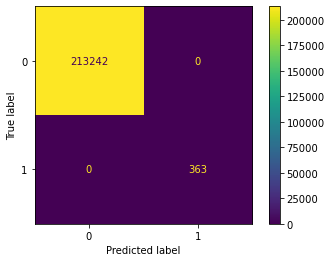

Accuracy without cross-validation: 100.0
Accuracy with 10-fold cross-validation: 99.92
ROC value: 0.8785979537262117
F score: 0.7724719101123596
Precision: 0.7575757575757576
Recall: 0.764951321279555


In [50]:
accu_dt, prediction_dt, accu_cv_dt, roc_dt, f1_dt, precision_dt, recall_dt = run_ml_algo(DecisionTreeClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_dt)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_dt)
print("ROC value: %s" % roc_dt)
print("F score: %s" % f1_dt)
print("Precision: %s" % precision_dt)
print("Recall: %s" % recall_dt)

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,prediction_dt)

print("FPR is: %s" %fpr)
print("TPR is: %s" %tpr)
print("Thresholds is: %s" %thresholds)

FPR is: [0.00000000e+00 3.79850123e-04 1.00000000e+00]
TPR is: [0.         0.75757576 1.        ]
Thresholds is: [2 1 0]


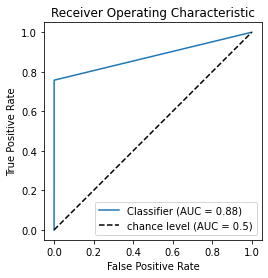

In [52]:
RocCurveDisplay.from_predictions(y_train,prediction_dt)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

#### Could not run KNeighborsClassifier. Kernal kept dying!

### Random Forest

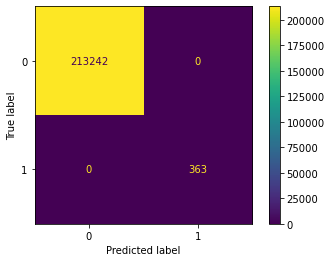

Accuracy without cross-validation: 100.0
Accuracy with 10-fold cross-validation: 99.96
ROC value: 0.8883992702660951
F score: 0.9559322033898305
Precision: 0.7768595041322314
Recall: 0.8571428571428571


In [53]:
accu_rf, prediction_rf, accu_cv_rf, roc_rf, f1_rf, precision_rf, recall_rf = run_ml_algo(RandomForestClassifier(n_jobs=-1), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_rf)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_rf)
print("ROC value: %s" % roc_rf)
print("F score: %s" % f1_rf)
print("Precision: %s" % precision_rf)
print("Recall: %s" % recall_rf)

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,prediction_rf)

print("FPR is: %s" %fpr)
print("TPR is: %s" %tpr)
print("Thresholds is: %s" %thresholds)

FPR is: [0.00000e+00 6.09636e-05 1.00000e+00]
TPR is: [0.        0.7768595 1.       ]
Thresholds is: [2 1 0]


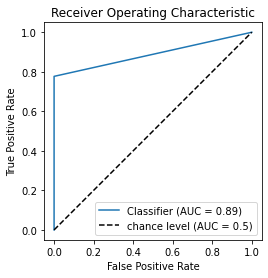

In [55]:
RocCurveDisplay.from_predictions(y_train,prediction_rf)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

#### Could not run GradientBoostingClassifier. Too slow!

### AdaBoost

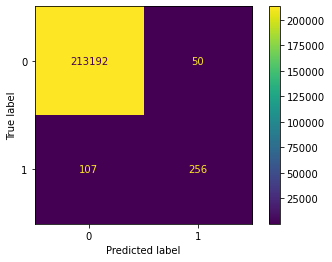

Accuracy without cross-validation: 99.93
Accuracy with 10-fold cross-validation: 99.93
ROC value: 0.8552546631340592
F score: 0.8376623376623377
Precision: 0.7107438016528925
Recall: 0.7690014903129657


In [56]:
accu_ab, prediction_ab, accu_cv_ab, roc_ab, f1_ab, precision_ab, recall_ab = run_ml_algo(AdaBoostClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_ab)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_ab)
print("ROC value: %s" % roc_ab)
print("F score: %s" % f1_ab)
print("Precision: %s" % precision_ab)
print("Recall: %s" % recall_ab)

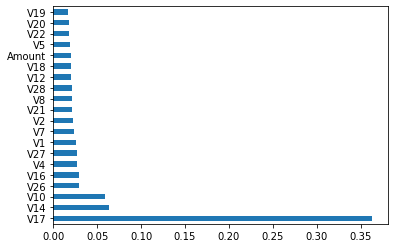

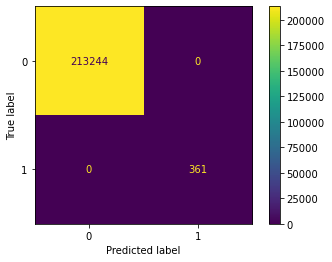

Accuracy without cross-validation: 100.0
Accuracy with 10-fold cross-validation: 99.96
ROC value: 0.8933072506487438
F score: 0.9372937293729373
Precision: 0.7867036011080333
Recall: 0.8554216867469879


In [122]:
accu_xg, prediction_xg, accu_cv_xg, roc_xg, f1_xg, precision_xg, recall_xg = run_ml_algo(XGBClassifier(), x_train, y_train, 10)

print("Accuracy without cross-validation: %s"  % accu_xg)
print("Accuracy with 10-fold cross-validation: %s" % accu_cv_xg)
print("ROC value: %s" % roc_xg)
print("F score: %s" % f1_xg)
print("Precision: %s" % precision_xg)
print("Recall: %s" % recall_xg)

In [123]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,prediction_xg)

print("FPR is: %s" %fpr)
print("TPR is: %s" %tpr)
print("Thresholds is: %s" %thresholds)

FPR is: [0.00000000e+00 8.90998105e-05 1.00000000e+00]
TPR is: [0.        0.7867036 1.       ]
Thresholds is: [2 1 0]


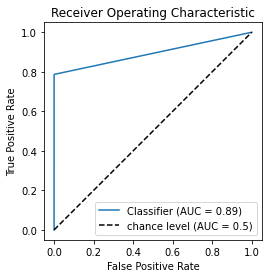

In [129]:
RocCurveDisplay.from_predictions(y_train,prediction_xg)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

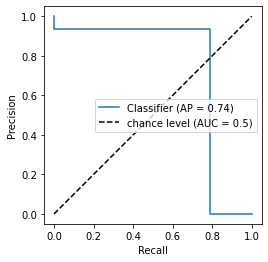

In [131]:
PrecisionRecallDisplay.from_predictions(y_train,prediction_xg)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

### Comparing all the models

In [60]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Stochastic Gradient Decent',
              'Gaussian Naive Bayes', 
              'Support Vector Classifier',
              'Decision Tree Classifier', 
              'Random Forest',
              'AdaBoost',
              'XGBoost'],
    'Regular Accuracy Score': [
        accu_log, 
        accu_sgd,  
        accu_nb, 
        accu_svc,  
        accu_dt,
        accu_rf,
        accu_ab,
        accu_xg],
    'CV Accuracy Score': [
        accu_cv_log, 
        accu_cv_sgd,  
        accu_cv_nb, 
        accu_cv_svc,  
        accu_cv_dt,
        accu_cv_rf,
        accu_cv_ab,
        accu_cv_xg],
    'ROC Value': [
        roc_log, 
        roc_sgd,  
        roc_nb, 
        roc_svc,  
        roc_dt,
        roc_rf,
        roc_ab,
        roc_xg],
    'Precision': [
        precision_log, 
        precision_sgd,  
        precision_nb, 
        precision_svc,  
        precision_dt,
        precision_rf,
        precision_ab,
        precision_xg],
    'Recall': [
        recall_log, 
        recall_sgd,  
        recall_nb, 
        recall_svc,  
        recall_dt,
        recall_rf,
        recall_ab,
        recall_xg],
    'F Score': [
        f1_log, 
        f1_sgd,  
        f1_nb, 
        f1_svc, 
        f1_dt,
        f1_rf,
        f1_ab,
        f1_xg
]})
models.sort_values(by='ROC Value', ascending=False)

,Model,Regular Accuracy Score,CV Accuracy Score,ROC Value,Precision,Recall,F Score
7,XGBoost,100.00,99.96,0.892534,0.785124,0.863636,0.959596
5,Random Forest,100.00,99.96,0.888399,0.776860,0.857143,0.955932
4,Decision Tree Classifier,100.00,99.92,0.878598,0.757576,0.764951,0.772472
6,AdaBoost,99.93,99.93,0.855255,0.710744,0.769001,0.837662
0,Logistic Regression,99.91,99.90,0.834476,0.708455,0.669421,0.688385
2,Gaussian Naive Bayes,99.30,99.30,0.813597,0.143930,0.633609,0.234574
3,Support Vector Classifier,99.83,99.83,0.500000,0.000000,0.000000,0.000000
1,Stochastic Gradient Decent,99.82,99.82,0.499958,0.000000,0.000000,0.000000


### Important Note
Accuracy does not capture the imbalance in the data.
F score is a better measure of incorrectly classified cases!

## Tip
- Precision-Recall (PR) curve is better than the ROC curve for unbalanced data!
- Accuracy is used when TP and TN are more important.
- F score is used when FP and FN are more important.

### XGBoost provided the best results!
#### We can further improve the results by tuning the hyperparameters.

##### Example is given here. I did not run it because it was taking a long time.
parameters = {
    'nthread': [4],
    'max_depth': range (2, 10, 1),
    'learning_rate': [0.1, 0.01, 0.05],
    'seed': [42]
}

grid_search = GridSearchCV(XGBClassifier(),parameters,scoring='roc_auc',cv=10,verbose=2)

grid_search.fit(x_train,y_train)

grid_search.best_params_, grid_search.best_score_

### The final model can be trained using the best parameters.